# Dimensionality reduction

Sometimes a dataset has a large number of features and it is hard to make sense of it because it is difficult to visualize. At the same time it is probably that some features are correlated, making them at least partially redundant. In those cases, one can attempt to reduce the dimensions of the dataset by searching for the "most relevant" directions along which to look at the dataset. Principal Component Analysis, is a standard way of achieving this result.

In [80]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 2D Case

To understand what PCA does, the simplest is too look at a 2D example. In this case dimensionality reduction is not very useful but illustrative: we have two features and try to summarize them with a single one.

We use here again the seeds dataset, as it contains a few clearly correlated features:

In [71]:
seeds = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt',
                    sep='\t', on_bad_lines='skip', names=['area', 'perimeter', 'compactness', 'length', 'width', 'symmetry_coef', 'length_groove', 'seed_type']
)

For example the ```perimeter``` and ```length``` of the seeds is higly correlated:

<Axes: xlabel='length', ylabel='perimeter'>

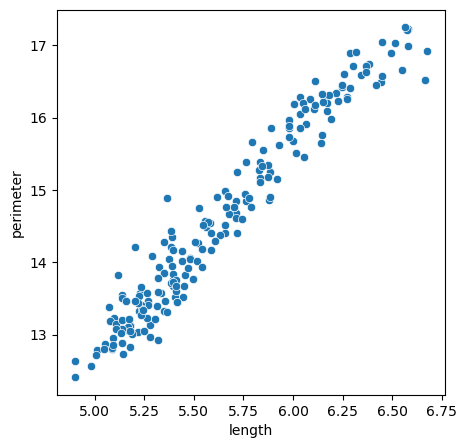

In [73]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(seeds, x='length', y='perimeter')

Instead of needing two features to describe this dataset, we could try to change the coordinate system so that one axis follows the cloud of points. If we achieve that, by keeping the information of where points are along this single line, we don't loose too much information about our data. This is exactly what PCA allows us to do. In scikit-learn it works like all other models. First we instantiate the model:

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA()

We select the features to reduce by PCA and fit the model:

In [76]:
X = seeds[['length', 'perimeter']]
pca.fit(X=X)

PCA()

Now the model contains information about the features. For example we get a new system of coordinates that maximizes the information. It is stored in:

In [77]:
vects = pca.components_

In [78]:
vects

array([[ 0.31438228,  0.94929647],
       [ 0.94929647, -0.31438228]])

We can plot it on top of our cloud of points to visualize the effect:

In [82]:
cm = X.mean().values

vect1 = np.array([cm, cm + 10 * vects[:,0]])
vect2 = np.array([cm, cm + 10 * vects[:,1]])

(12.0, 18.0)

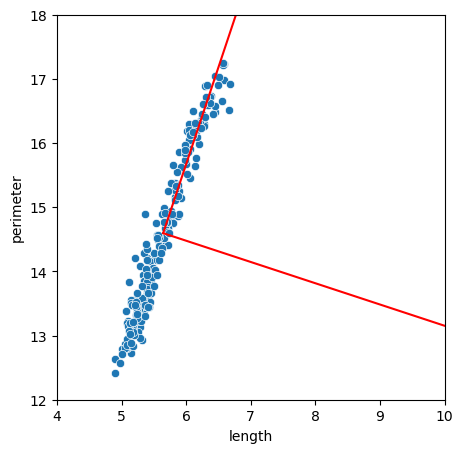

In [85]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(seeds, x='length', y='perimeter')
plt.plot(vect1[:,0], vect1[:,1],'r')
plt.plot(vect2[:,0], vect2[:,1],'r')
ax.set_xlim(4, 10)
ax.set_ylim(12, 18)

The ```explained_variance_``` parameters indicates how much of the variations in the cloud can be attributed to each feature. Those are ordered by decreasing importance i.e. the first components indicate the largest variations:

In [87]:
pca.explained_variance_

array([1.9045692 , 0.00947078])

## Data transform

Using the above new coordinates, we can now transform the origina ```X``` so that coordinates are actually aligned:

In [98]:
X_transformed = pca.transform(X)

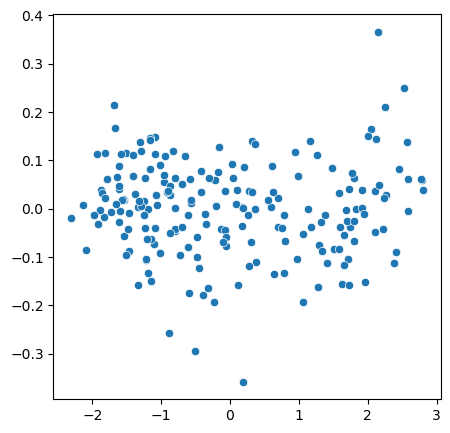

In [101]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x=X_transformed[:,0], y=X_transformed[:,1]);

## Higher dimensions

We can now apply this to more complex problems of higher dimensions and of different nature. For example if we can try to find principal components of images! For this we use some data from the [quickdraw dataset](https://quickdraw.withgoogle.com/) where Google collected thousands of small drawings of every day life. We look at violins:

In [152]:
images = np.load('../data/full_numpy_bitmap_violin.npy')

In [153]:
images.shape

(217260, 784)

The dataset is composed of 217260 images of 28x28=784 pixels. The images are linearized, i.e. the dimensions are flattened to result in a long list of pixels. We an visualize an image by reshaping it:

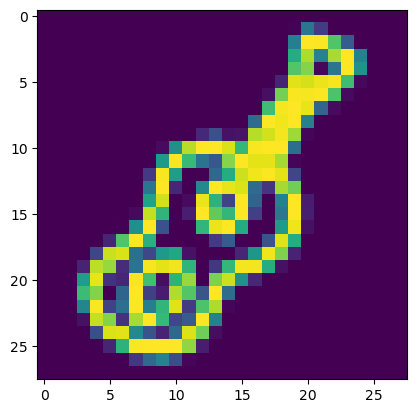

In [154]:
plt.imshow(images[0].reshape((28,28)));

In its linearized shape an image can be seen a composed by a number of features corresponding to the total number of pixels. And so we can forget about the 2D structure of the image and treat it as a regular dataset. In particular, if the images have things in common, like here representing the same objects, we can expect that certain pixels will tend to be correlated and so we can reduce an image to its principal components.

Let's try to reduce the image and use 100 components for that:

In [195]:
pca = PCA(n_components=100)
pca.fit(X=images)

PCA(n_components=100)

We can visualize the imporance of each feature in a plot:

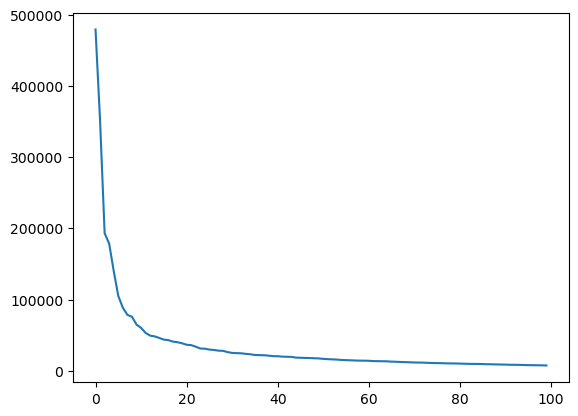

In [196]:
plt.plot(pca.explained_variance_);

Here we see that we have an exponential fall-of of importance. Below the 20th feature, features become vanishingly important.

We can now transform our images using PCA:

In [197]:
X_pca = pca.transform(images)

In [198]:
X_pca.shape

(217260, 100)

We see that now instead of 784 pixels or features we only have 100. We cannot really plot this output as it doesn't represent an image anymore. However we can now re-transform this image in the original space by a reverse transform. In the previous 2D case from before, you can imagine that we put back the points along the diagonal but completely aligned. In the case of an image, this means that we'll loose some details:

In [199]:
X_rev = pca.inverse_transform(X_pca)

In [200]:
X_rev.shape

(217260, 784)

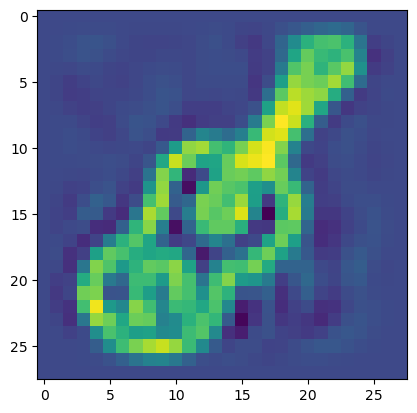

In [201]:
plt.imshow(X_rev[0].reshape((28,28)));

We can also look at the structure of just the two first principal components in a scatter plot. They should give some fundamental information on the content of the dataset:

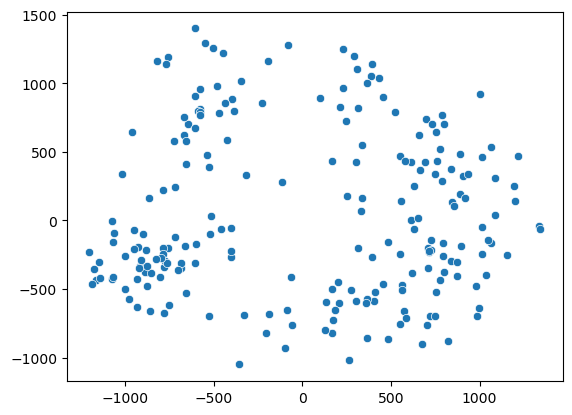

In [202]:
sns.scatterplot(x=X_pca[::1000,0], y=X_pca[::1000,1]);

We see somehow two clouds of points. Let's try to pick points in two regions of the first axis:

In [209]:
X.shape

(199, 4)

In [212]:
region1 = images[X_pca[:,0] < -1000]
region2 = images[X_pca[:,0] > 1000]
region3 = images[(X_pca[:,0] < 0) & (X_pca[:,1] > 500)]

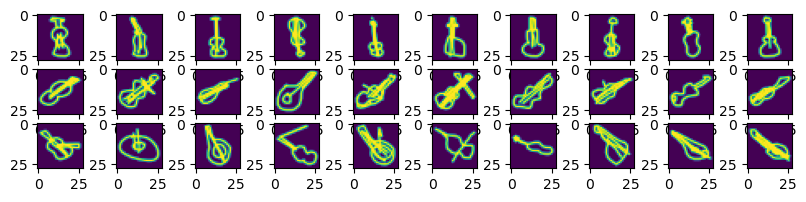

In [213]:
fig, ax = plt.subplots(3,10, figsize=(10,2))
for x in range(10):
    ax[0,x].imshow(region1[x].reshape((28,28)));
    ax[1,x].imshow(region2[x].reshape((28,28)));
    ax[2,x].imshow(region3[x].reshape((28,28)));

We see that the first components basically give us the orientation of the violin in the images!

## Exercise

1. Import the seeds dataset
2. Perform PCA with all components except seed_type
3. Transform the data and plot only the two first dimensions
4. Color the dots by seed_type. What do you notice?
5. Try to identify the three seeds by clustering the 2 first PCA using KMeans

In [331]:
seeds = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt',
                    sep='\t', on_bad_lines='skip', names=['area', 'perimeter', 'compactness', 'length', 'width', 'symmetry_coef', 'length_groove', 'seed_type']
)